<h1 style="background-color: #2882A9; color: white; padding: 10px;">PREDICCIÓN DE VIDA ÚTIL REMANENTE DE MOTORES</h1>

<p style="text-align: right; font-size: 18px">Máster Big Data & Business Analytics</p>
<p style="text-align: right; font-size: 18px">Universidad Complutense de Madrid</p>
                                                                               
<p style="text-align: right;font-size: 18px">Trabajo Final de Máster</p>
<p style="text-align: right;font-size: 18px">Gaby Laborde</p>                                     

                                                                                

<h2 style="background-color: #80B8D1 ; color: white; padding: 5px;font-size: 20px;">  ÍNDICE</h2>

- [01-CONTEXTO](#contexto)  

- [02- INTRODUCCIÓN Y OBJETIVO](#intro)  

- [03- ANÁLISIS EXPLORATORIO DE DATOS](#eda)  

- [04- TRANSFORMACIÓN Y SELECCIÓN DE VARIABLES](#fe)  

- [05- INTRODUCCIÓN A LA ESTRATEGIA DE MODELADO](#est)  

- [06- ENTRENAMIENTO Y EVALUACIÓN - MODELO SIN DEPENDENCIA TEMPORAL](#m1)  

- [07- ENTRENAMIENTO Y EVALUACIÓN - CON ANÁLISIS TEMPORAL](#m2)  

- [08- ENTRENAMIENTO Y EVALUACIÓN - RED NEURONAL RECURRENTE](#m3)  

- [09- DESPLIEGUE DEL MODELO FINAL](#despliegue)  

- [10- CONCLUSIONES](#conclusiones)

- [ANEXO A - ANALISIS EXPLORATORIO DE DATOS](#anexoa)
- [ANEXO B - IMPUTACIÓN RUL](#anexob)
- [ANEXO C -  TRANSFORMACIÓN Y SELECCIÓN DE VARIABLES](#anexoc)
- [ANEXO D - ENTRENAMIENTO Y EVALUACIÓN -  MODELO SIN DEPENDENCIA TEMPORAL](#anexod)
- [ANEXO E  - ANÁLISIS DE SERIE TEMPORAL](#anexoe)
- [ANEXO F - ENTRENAMIENTO Y EVALUACIÓN - CON ANÁLISIS TEMPORAL](#anexof)
- [ANEXO G - ENTRENAMIENTO Y EVALUACIÓN - RED NEURONAL RECURRENTE PARTE I](#anexog)
- [ANEXO H - ENTRENAMIENTO Y EVALUACIÓN - RED NEURONAL RECURRENTE PARTE II](#anexoh)
- [ANEXO I - DESPLIEGUE DEL MODELO](#anexoi)
- [ANEXO J - ACCESO A LOS DATOS](#datos)



<h2 id="contexto" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size: 20px;">CONTEXTO</h2>

En el marco actual de Industria 4.0, la optimización de recursos y procesos se ha convertido en un desafío clave para garantizar la eficiencia operativa y la competitividad de las empresas. En este contexto la confiabilidad del equipamiento industrial juega un rol imprescindible, y dentro de éste el mantenimiento predictivo ha ido cobrando más y más importancia en los últimos años.  
El **mantenimiento predictivo** tiene como objetivo predecir cuándo ocurrirán fallos o problemas en los equipos, utilizando datos históricos y técnicas analíticas. En lugar de realizar mantenimientos preventivos con una frecuencia estipulada, o correctivos luego de la ocurrencia de fallos, el enfoque predictivo utiliza algoritmos y modelos para detectar los momentos más propicios para llevar a cabo tareas de mantenimiento. Una de las áreas críticas de enfoque es la estimación de la vida útil remanente. La capacidad de prever cuánto tiempo un equipo continuará siendo funcional y productivo antes de que sea necesario reemplazarlo es fundamental para minimizar costos, maximizar la utilización de recursos y evitar interrupciones no planificadas en las operaciones. Con lo anterior se consiguen ahorros asociados a tiempos de inactividad y reparaciones no programadas. La incorporación de la inteligencia artificial en el mantenimiento predictivo agrega un nivel adicional de precisión y capacidad de análisis, permitiendo la identificación de patrones y tendencias en los datos que podrían no ser evidentes para los métodos tradicionales.

<h2 id="intro" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size: 20px;">INTRODUCCIÓN Y OBJETIVO</h2>

El presente trabajo tiene por **objetivo general** obtener un modelo capaz de predecir la vida útil remanente de motores. Para lograr esto, se trabajará con el dataset: *NASA Turbofan Jet Engine Data Set* de la plataforma *Kaggle*.

Los datos consisten en diferentes series temporales multivariables, donde cada serie temporal (trayectoria) representa un motor diferente. Cabe destacar que la recolección fue realizada con motores que tienen tanto diferentes grados de desgaste inicial como aspectos de fabricación distintos.  

Se presentan cuatro conjuntos de datos. En estos conjuntos, los motores funcionan normalmente al comienzo de cada serie temporal y desarrollan una falla en algún momento durante la serie. En los datos de entrenamiento, los motores funcionan hasta producirse el fallo, mientras que, en el conjunto de prueba, la serie temporal termina algún tiempo antes del fallo. De este modo, el objetivo es predecir el número de ciclos operativos restantes antes del fallo para el conjunto de prueba. Cada uno de los cuatro conjuntos de datos fue recopilado en diferentes escenarios. Estos escenarios son una combinación de posibles modos de falla y condiciones operativas. En particular, se seleccionó el escenario más complejo: un conjunto de datos en el que las condiciones operativas varían (seis posibles condiciones de trabajo) y los motores fallan por dos modos diferentes.

**Datos del escenario seleccionado (FD004)**:
- Trayectorias de entrenamiento: 248 motores (61249 observaciones)
- Trayectorias de prueba: 249 motores (41214 observaciones)
- Condiciones operativas: SEIS
- Modos de Falla: DOS (Degradación HPC, Degradación del Ventilador)

El conjunto de Datos está compuesto por:
- Train: conjunto de datos de entrenamiento
- Test: conjunto de datos de prueba
- RUL: RUL del conjunto de datos de prueba (variable a predecir)

Asimismo, los dataset Train y Test están constituidos por 26 variables: número de unidad de motor (*unit_num*), tiempo en ciclos del motor (*cycle*), 3 variables de configuración operativas (*setting_1*, *setting_2* y *setting_3* ) y finalmente 21 sensores (*s_n°sensor*). Estos sensores representan mediciones de temperatura, presión, velocidad, flujo, entre otros, tomados en diversos puntos del equipo.

Además del objetivo general, el trabajo tiene por **objetivo específico** explorar diversas metodologías para lograr el objetivo final. Se comenzará con un enfoque simple y se avanzará hacia soluciones más complejas, con el propósito de aumentar gradualmente la precisión del modelo y demostrar la eficacia de las distintas herramientas disponibles en la actualidad.

<h2 id="eda" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size: 20px;">ANÁLISIS EXPLORATORIO DE DATOS (EDA)</h2>

Antes de iniciar, es importante resaltar que esta sección detallará los pasos del Análisis Exploratorio de Datos (EDA) y mostrará los resultados obtenidos en el proceso. Sin embargo, para acceder al código completo se debe consultar el **ANEXO A**.

Para dar inicio a la etapa de Análisis Exploratorio de Datos, se procedió a cargar tanto los conjuntos de datos de entrenamiento como los de prueba. A continuación, se combinaron ambos conjuntos a efectos de obtener una visión integral de la distribución de los datos y las interrelaciones entre las variables.
Previo a realizar una representación gráfica de los datos, se verificó: ausencia de datos nulos, ausencia de registros duplicados, asignación correcta del tipo de datos. 

La imagen debajo representa un extracto del conjunto de datos:
- **unit_num**: número de unidad del motor 
- **cycle**: cantidad de ciclos del motor
- **setting_1 a setting_3**: representan las condiciones operativas bajo las cuales trabaja el motor. Si bien son valores numéricos se trataron como variables de clase, puesto que como máximo se presentan 6 condiciones de trabajo.
- **s_1 a s_21**: representan diferentes mediciones de sensores de temperatura, presión, velocidad, flujo, entre otros.
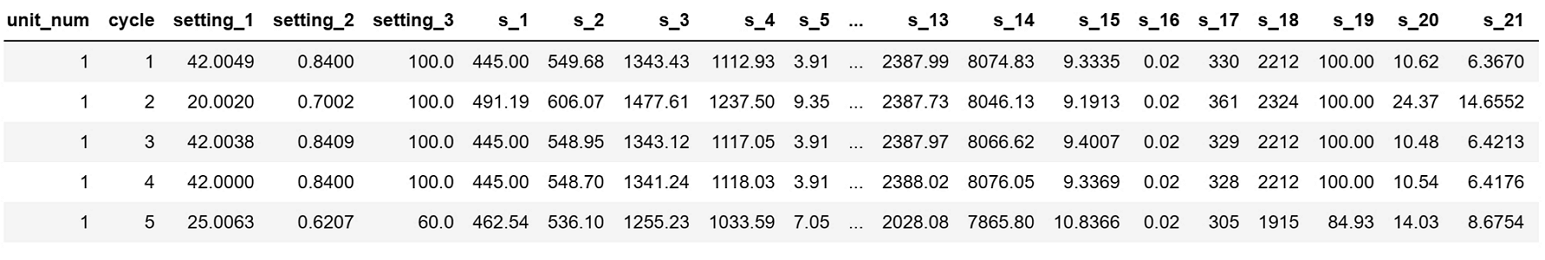

#### VISUALIZACIÓN INICIAL
Para iniciar la exploración gráfica de las distintas variables, se llevó a cabo una fase inicial de visualización a través del análisis de histogramas para cada variable (*Figura 1A*). Esta aproximación permitió obtener una comprensión preliminar de la distribución y la forma de cada variable de datos en estudio.

Se puede observar claramente la existencia de diversas distribuciones dentro de una misma variable (*Figura 1A*). Esta variabilidad podría atribuirse a las diversas condiciones operativas que son determinadas por los valores de los parámetros setting_1, setting_2 y setting_3. Es importante destacar que el conjunto de datos fue registrado bajo seis condiciones operativas distintas, generadas a su vez mediante las tres opciones de configuración previamente mencionadas.

Al examinar más de cerca estas tres variables en particular, se detecta que los valores de los parámetros setting_1 y setting_2 presentan únicamente seis y cinco valores respectivamente (con cierto grado de ruido asociado) mientras que la variable setting_3 asume únicamente dos valores. Adicionalmente, al examinar la manera en que se interconectan estos valores en las diferentes configuraciones, se corrobora que solo se presentan un total de seis combinaciones únicas, es decir 6 posibles condiciones de operación. 

Estas combinaciones únicas son determinantes para las diferentes distribuciones observadas en el primer histograma. En efecto, al examinar los histogramas de las variables bajo **una única condición operativa**, se observa un cambio en el comportamiento previamente observado. Ya no se visualizan diversas distribuciones con diferentes rangos centrales, sino una única distribución. Esto se ilustra en la *Figura 1B*, donde se muestra la distribución correspondiente a una de las seis condiciones operativas.

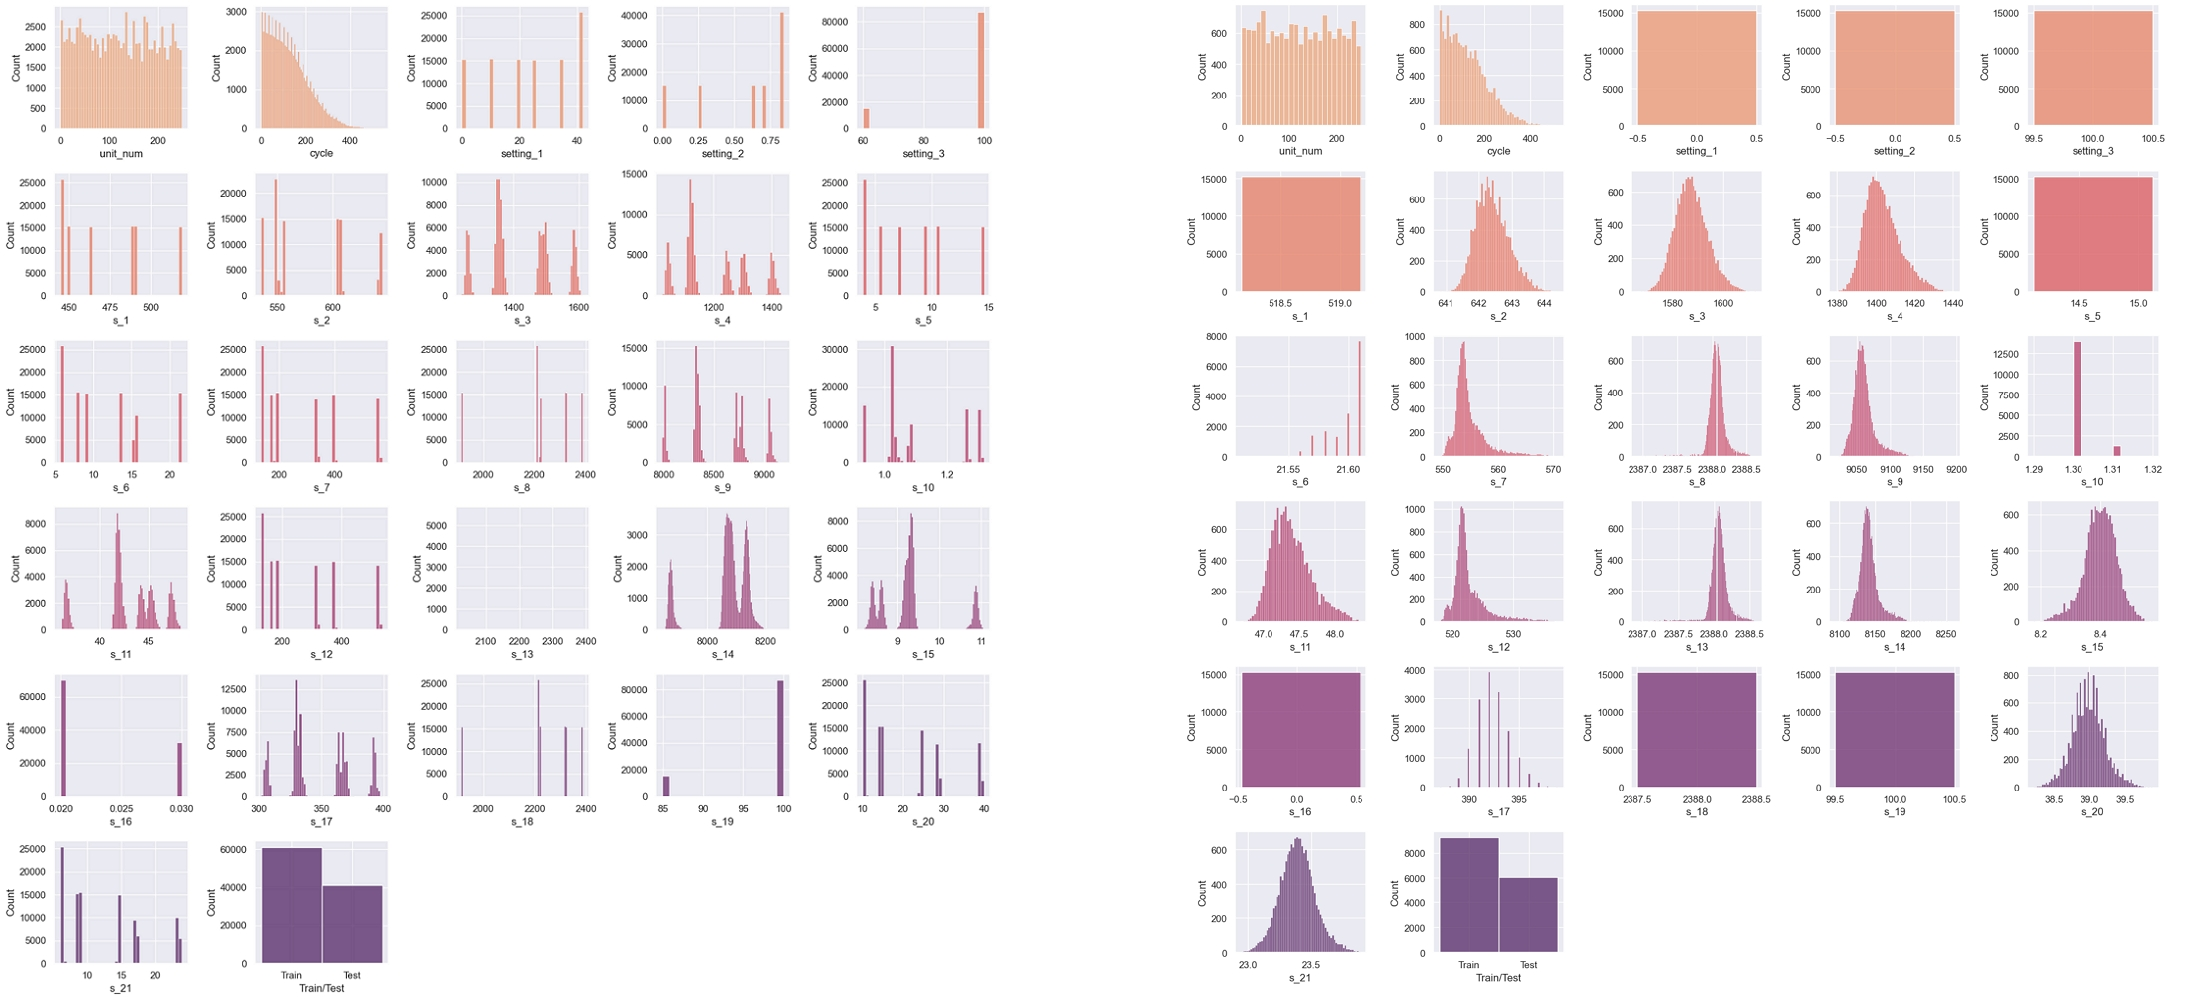
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 1A (izquierda): Histograma de variables -- Figura 1B (derecha) Histograma de variables para una condición operativa</div>

En resumen, al realizar un análisis detallado de las distribuciones de las variables en relación con las condiciones operativas, se pueden identificar patrones y características específicas que proporcionan información valiosa sobre el comportamiento de los datos en diferentes escenarios de operación:

- La mayoría de los sensores tienen una distribución distinta para cada condición operativa.
- Hay sensores cuyo valor depende únicamente de la condición de operación, manteniendo a su vez un valor constante para cada condición (ejemplo s_1,s_5,s_16,s_18,s_19). Es decir, quedan totalmente predeterminadas por la condición de trabajo del equipo.
- A su vez hay variables que no toman tantas distribuciones como condiciones operativas, por lo que tienen puntos/valores en común para distintas condiciones de operación.  

#### RELACIÓN ENTRE VARIABLES

**VARIABLE OBJETIVO (RUL)**  
Antes de adentrarnos en el análisis de la relación entre las diversas variables y la variable objetivo ("Remaining Useful Life" - RUL) es crucial calcular esta última. Dado que no se dispone de información directa sobre la RUL en el conjunto de datos de entrenamiento, sino sobre la cantidad de ciclos que un motor realiza antes de su fallo, se deben crear estimaciones.

En los análisis de predicción de vida útil remanente existen diferentes enfoques para modelar la degradación de un equipo. El enfoque menos complejo es el de *degradación lineal*, donde se asume que la vida útil disminuye de manera constante en cada ciclo hasta alcanzar un valor de cero en el momento de la falla. Sin embargo, existe otro enfoque conocido como *degradación lineal por tramos (clipped)*, en el que se asume que la vida útil de la unidad se mantiene constante durante la mayoría de los ciclos y luego de un determinado punto disminuye linealmente hasta alcanzar cero. Lo anterior se basa en el hecho de que la degradación de un sistema generalmente no es perceptible hasta después de que la unidad haya sido utilizada durante algún período de tiempo y haya ocurrido una falla inicial. Si un motor es nuevo y se encuentra trabajado en condiciones saludables, es poco razonable que se comience a dar una degradación. Solo después de que la unidad haya sido utilizada durante un tiempo, la degradación se hará evidente. Por lo antedicho, parece razonable estimar la RUL mediante un modelo de degradación lineal por tramos.

En los datos de entrenamiento, el último ciclo reportado para cada motor corresponde al ciclo en el que ocurre la falla, por lo tanto, en ese punto, la vida útil remanente es cero. En el ciclo anterior, sabemos que le queda un ciclo, en el ciclo previo a ese, le quedan dos, y así sucesivamente hasta llegar al valor "clip" a partir del cual no se considera que haya degradación. La imputación de los valores de RUL se llevó a cabo de acuerdo con esta lógica. En el **ANEXO B: IMPUTACIÓN RUL** se ilustra este proceso y se demuestra cómo el enfoque de *degradación lineal por tramos* conduce a mejores resultados que el de *degradación lineal*.

En el caso de los datos de prueba, se presenta una situación diferente. Para cada motor en el conjunto de prueba, se cuenta con una ventana de tiempo dada, donde el último ciclo informado no se corresponde necesariamente con una vida útil remanente de cero, sino más bien con la RUL que se desea predecir.

**VARIABLES CATEGÓRICAS**  
Como se observó anteriormente, las variables relacionadas con condiciones operativas presentan un rango limitado de valores (hasta seis). Aunque numéricas, estas cifras no siguen un orden lógico, sino que indican puntos específicos de funcionamiento. Por ello, es recomendable tratarlas como categóricas, dadas su naturaleza discreta y el objetivo de representar estados de trabajo distintos.

Es esencial destacar que, al considerar estas variables operativas como categóricas, es importante examinar las frecuencias de cada clase. Esta verificación asegura que todas las categorías estén representadas de manera adecuada en el conjunto de datos, garantizando que ningún valor tenga una influencia excesiva en el análisis. En este contexto, consideramos que una clase con una frecuencia menor al 2-5% está poco representada. Sin embargo, observamos que incluso la frecuencia más baja registrada es del 15%, lo que significa que no hay categorías poco representadas en nuestro conjunto de datos.

En el análisis de variables categóricas en relación con una variable objetivo numérica, es común emplear gráficos de tipo boxplot. El boxplot permite visualizar la distribución de los valores de la variable objetivo para cada categoría. La *Figura 2* representa dicho gráfico. Se identifica que existe relación entre estas variables y la objetivo ya que se puede apreciar diferentes valores de las medidas centrales, como por ejemplo la mediana, entre las distintas categorías. 

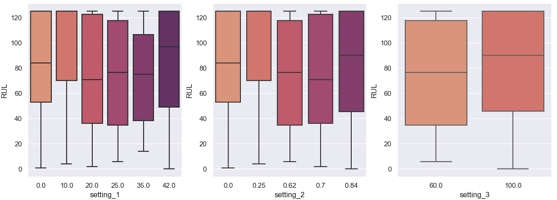
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 2: Variables categóricas vs variable objetivo</div>

**VARIABLE NUMÉRICAS**  
En el caso de las variables numéricas, se procedió a generar gráficos de dispersión que ilustran la relación entre las variables independientes (sensores) y la variable objetivo (RUL). Cada condición operativa se identificó con un color distinto en los gráficos (*Figura 3*). Estos gráficos reflejaron consistentemente la segregación en los rangos de valores asociados a las diversas condiciones de trabajo, como se había anticipado previamente en los histogramas.

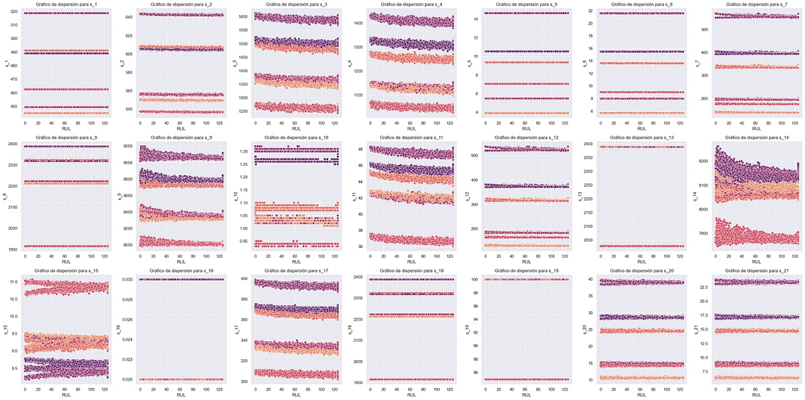
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 3: Gráficos de dispersión (sensores vs RUL) para cada condición operativa</div>

Para poder comprender y ver más de cerca si existe una relación entre los diferentes sensores y la variable objetivo, se repitió el mismo gráfico pero para una condición de operación fija (*Figura 4*).

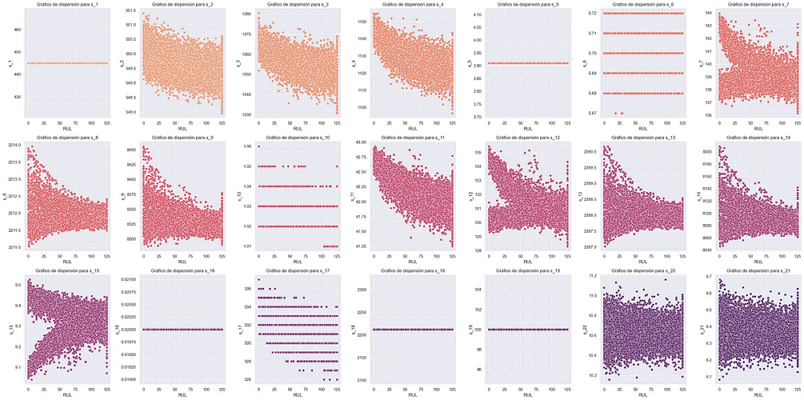
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 4: Gráficos de dispersión (sensor vs RUL) una condición operativa</div>

Del anterior gráfico se extraen las siguientes observaciones: 
- Para los sensores 2, 3, 4, 11 y 17, se percibe una tendencia similar en la que valores más altos de estos sensores parecen estar asociados con valores más bajos de RUL.
- Los sensores 7, 8, 9, 12, 13, 14 y 15 también muestran una tendencia en relación con RUL, pero es importante destacar que estas tendencias varían entre distintos motores. Esto sugiere la posibilidad de una diferenciación entre los dos tipos de fallas que podrían ocurrir. 
- En contraste, los sensores 6, 10, 20 y 21 no presentan una tendencia clara en relación con RUL. Por lo tanto, será esencial realizar un análisis más detallado de estos sensores en la sección de selección de variables.
- Por último, como se vio anteriormente, los sensores 1,5,16,18 y 19 tienen un valor constante dada una condición operativa.


<h2 id="fe" style="background-color: #80B8D1 ; color: white; padding: 5px; font-size:20px;">TRANSFORMACIÓN Y SELECCIÓN DE VARIABLES</h2>

Previo a adentrarnos en la etapa de selección de variables, se estableció un modelo base mediante una regresión lineal. Este modelo inicial servirá como punto de partida fundamental para orientar las decisiones y estrategias. Para ello se comenzó imputando la RUL en el conjunto de entrenamiento, y al mismo tiempo se realizó la segregación de la variable objetivo (**y_train**) de las variables predictoras (**X_train**). Cabe destacar que, en el caso de las variables predictoras, se excluyeron las columnas "*unit_num*" y "*cycle*". La primera se trata de una variable de identificación, y la segunda ya fue utilizada previamente para el cálculo de RUL. En el caso del conjunto de prueba, eliminamos las mismas columnas. Además, dentro de **X_test**, solo estamos interesados en el último ciclo de tiempo reportado para cada motor, ya que solo tenemos valores reales de RUL para esos registros (**y_test**).

El proceso de entrenar y evaluar un **Modelo Base** se realizó mediante validación cruzada con la técnica de GroupShuffleSplit, que divide los datos en conjuntos de entrenamiento y validación respetando el número de unidad de motor. Es decir, asegura que todos los registros de un mismo motor estén presentes en un solo conjunto, evitando dispersión de datos entre diferentes pliegues. La preservación de la homogeneidad de los grupos asegura que la evaluación sea más precisa y realista, reflejando las condiciones reales en las que el modelo operaría posteriormente en motores individuales. Es importante destacar que esta nueva división se realizó sobre el conjunto de entrenamiento, manteniendo el conjunto de prueba intacto para ser utilizado sólo para evaluar el *Modelo Final*.

Como métrica de evaluación se optó por el RMSE (Root Mean Square Error) que mide la raíz de las sumas de errores al cuadrado. El objetivo principal es predecir con la mayor precisión posible la RUL de los motores. Si bien tanto el MSE (Mean Square Error) como el RMSE se enfocan en penalizar los errores mayores, evitando pronósticos significativamente incorrectos en el ámbito de mantenimiento, el RMSE tiene la ventaja de ser intuitivo y más fácil de interpretar. 

#### TRANSFORMACIÓN INICIAL DE VARIABLES

En lo referente a las variables numéricas se aplicó un escalado de las mismas. El escalado es necesario para muchos algoritmos (aunque no todos) debido a que pueden verse influenciados por las disparidades de escala. Es decir, para evitar que variables con valores más grandes pueden tener un impacto desproporcionado en el modelo. Como se vio en la sección de EDA, las variables numéricas tienen diferente distribución según la condición operativa del sistema. Por ello se optó por probar dos enfoques, un *escalado global* y un *escalado por condición operativa*. Se compararon ambos enfoques para determinar cuál mejora más la capacidad predictiva.

En cuanto al tratamiento de variables categóricas también se utilizaron dos estrategias. La primera consistió en utilizar una técnica de codificación one-hot (1 o 0 para cada clase) a las tres variables categóricas (setting_1 a setting_3). Sin embargo, dado que estas variables se combinan de manera exclusiva en tan solo seis condiciones operativas distintas, se exploró el impacto de crear una sola variable categórica que represente la condición operativa. Posteriormente, esta variable se transformó en variables dummies (one-hot). Esta estrategia también conlleva la ventaja de reducir la cantidad total de variables del conjunto de datos.

El siguiente cuadro refleja las distintas transformaciones evaluadas. Primero se partió del modelo base obteniendo un RMSE de 22.0 en el conjunto de validación. A continuación, se probaron los dos tipos de escalado mencionados. Como se puede observar, el escalado global no mejoró el resultado, mientras que con el escalado por condición operativa se obtuvo una mejora, arrojando un RMSE de 21.67. Finalmente, se evalúa el impacto de trabajar con una única variable categóricas en lugar de las 3 variables settings. Según se visualiza en la tabla, este escenario arroja el mismo resultado que el  anterior (RMSE 21.67). Sin embargo, en este escenario hemos reducido de 34 a 27 las variables. Por tanto, se continúa trabajando con esta última opción en lo referente a transformaciones.


|| Modelo Base | Modelo 2 | Modelo 3 | **Modelo4** |
|:------------:|:------------:|:------------:|:------------:| :------------:|
|**Algoritmo**| Regresión Lineal    |  Regresión Lineal    |  Regresión Lineal    |  Regresión Lineal|
|**Var. Categóricas**| Setting_1 a setting_3 convertidas a dummies   | Setting_1 a setting_3 convertidas a dummies    | Setting_1 a setting_3 convertidas a dummies    | **Como una única variable (condición_op) convertida a dummies** |
|**Var. Numéricas**| Sin escalar    | Escalado Global    | Escalado por Condición operativa    | **Escalado por Condición operativa** |
|**Condición de Evaluación**| 5 splits, val size 15%    | 5 splits, val size 15%  | 5 splits, val size 15%    |5 splits, val size 15% |
|**RMSE**| **22.0**   | **22.0**  | **21.67**    |**21.67** |

#### SELECCIÓN DE VARIABLES
Para dar inicio a la selección de variables se optó por trabajar con un método wrapper, en particular con la *Eliminación Recursiva de Características (RFE)*. La RFE es un proceso iterativo que comienza con todas las variables y, en cada iteración, elimina aquella que se considera menos relevante. A su vez, para hacer el proceso más robusto se utilizó validación cruzada, nuevamente con GroupShuffleSplit para preservar la homogeneidad en los conjuntos de train y validación.
De acuerdo con el resultado de la RFE el número óptimo de variables coincide con las variables totales: 27. Sin embargo al graficar los resultados se observó claramente que luego de un punto la mejora obtenida al adicionar más variables se vuelve muy pequeña. Para continuar profundizando se repitió el procedimiento de RFE con diferentes semillas (20 repeticiones) y en algunos casos se sugiere la eliminación de la variable *s_10*. 

Se analizó entonces el efecto de eliminar dicha variable. A su vez, según se detectó previamente, existen variables que están completamente determinadas por la condición operativa del sistema y que por tanto no agregarían información adicional al modelo. Incluirlas como predictoras no sería beneficioso y podría aumentar la complejidad innecesariamente (*s_1*,*s_5*,*s_18* y *s_19*). En este punto, para que la toma de decisiones en lo referente a selección de variables sea lo más robusta posible, se trabajó con un enfoque de validación cruzada repetida. Es decir, no solo se aplica validación cruzada estándar, sino que también se realizan múltiples repeticiones, permitiendo diferentes particiones aleatorias de los datos en cada iteración. De esta forma se obtiene una evaluación más sólida.

|| Caso A | Caso B | Caso C| Caso D |
|:------------:|:------------:|:------------:|:------------:| :------------:|
|**Algoritmo**| Regresión Lineal    |  Regresión Lineal    |  Regresión Lineal    |  Regresión Lineal|
|**Variables**| Todas    |  Quitando el sensor 10    |  Quitando sensores 1, 5, 18 y 19    |  Quitando sensores 1, 5, 10, 18 y 19|
|**Condición de Evaluación**| 5 splits, val size 15%, 10 repeticiones    | 5 splits, val size 15%, 10 repeticiones  | 5 splits, val size 15%, 10 repeticiones   |5 splits, val size 15%, 10 repeticiones |
|**RMSE**| **21.33**   | **21.33**  | **21.33**    |**21.33** |

Como podemos ver la eliminación de dichas variables no empeora los resultados obtenidos. 
Antes de proceder a su eliminación, se repitió el mismo procedimiento, pero con un modelo más complejo y flexible como es el Random Forest. Este modelo puede capturar relaciones no lineales e interacciones entre variables de manera más efectiva que la regresión lineal. La idea es combinar ambos enfoques para tener una visión más completa sobre el impacto de las diferentes variables y por tanto tomar decisiones más sólidas en cuanto a la selección de features. A su vez, se considera pertinente ya que, dada la naturaleza de los datos, se espera la existencia de relaciones no lineales.

|| Caso A | Caso B | Caso C| Caso D |
|:------------:|:------------:|:------------:|:------------:| :------------:|
|**Algoritmo**| Random Forest    |  Random Forest    | Random Forest    |  Random Forest|
|**RMSE**| **18.28**   | **18.27**  | **18.27**    |**18.27** |

Nuevamente, la eliminación de las variables no empeora el resultado obtenido, por tanto, se avanzó quitando esas cinco variables.

#### INGENIERÍA DE VARIABLES

Una técnica de ingeniería de características muy útil suele ser la creación de combinaciones polinomiales de las variables originales. Estas pueden revelar patrones en los datos que no son evidentes a partir de las características originales. En este caso se crearon nuevas variables con combinaciones polinomiales de segundo grado ([a, b] -> [1, a, b, a^2, ab, b^2]). Dado que lo anterior conduce a un aumento significativo de la cantidad de variables y por ende de la complejidad del modelo, se seleccionaron las 5 mejores variables transformadas en base al criterio de información mutua. Dicho criterio calcula cuánta información comparten las diferentes variables con el objetivo. Sin embargo, según se puede visualizar en la siguiente tabla, esta adición de variables transformadas solo tiene un impacto significativo al trabajar con un modelo lineal. La razón detrás de lo mencionado podría atribuirse al hecho de que en un modelo lineal se hace más necesario capturar otras relaciones cuando la naturaleza del problema es justamente no lineal. Sin embargo, otros algoritmos más complejos, como el Random Forest, tienen la capacidad inherente de capturar relaciones no lineales sin la necesidad de agregar términos polinómicos explícitos.Por ello no se consideró necesario adicionar estas transformaciones.

|| Caso A (Regresión Lineal) | Caso B (Regresión Lineal) | Caso A (Random Forest)| Caso B (Random Forest) |
|:------------:|:------------:|:------------:|:------------:| :------------:|
|**Variables**| Todas (a excepción de las ya eliminadas)    |  Adicionando 5 variables transformadas    | Todas (a excepción de las ya eliminadas)    |  Adicionando 5 variables transformadas |
|**Condición de Evaluación**| 5 splits, val size 15%, 10 repeticiones    | 5 splits, val size 15%, 10 repeticiones  | 5 splits, val size 15%, 10 repeticiones   |5 splits, val size 15%, 10 repeticiones |
|**RMSE**| **21.33**   | **20.25**  | **18.27**    |**18.23** |

El código completo para esta sección se puede consultar en el **ANEXO C**. 

<h2 id="est" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;">INTRODUCCIÓN A LA ESTRATEGIA DE MODELADO</h2>

En este proyecto el enfoque utilizado consistió en un desarrollo gradual, partiendo de un modelo inicial que no considera la dimensión temporal de los datos, hasta llegar a una estrategia más sofisticada que aprovecha la naturaleza secuencial de los registros.
En la primera etapa, se explora un modelo que trata cada observación de manera independiente, sin considerar su orden temporal. Aquí, se utiliza el conjunto de variables existentes y se aplican técnicas de regresión para predecir la RUL. Sin embargo, al reconocer la importancia de la temporalidad en estos datos, se genera una segunda fase. En esta segunda fase se incorpora el factor temporal al análisis. Se generan nuevas variables como variables rezagadas (lags) y estadísticos móviles (rolling) para capturar patrones y correlaciones a lo largo del tiempo. Esta estrategia enriquece la capacidad para captar tendencias y dependencias secuenciales en los datos, y por tanto se espera que mejore los resultados. Finalmente, se lleva la exploración un paso más allá, adoptando un enfoque de modelado más avanzado utilizando Long Short-Term Memory (LSTM). Esta arquitectura de red neuronal recurrente tiene la capacidad inherente de capturar relaciones temporales y secuenciales en los datos. Al emplear LSTM, buscamos explotar plenamente la riqueza de información temporal presente en los registros del conjunto de datos.

En resumen, a lo largo de este análisis se avanzará desde un enfoque más simple y no temporal hasta uno más sofisticado que considera las relaciones secuenciales presentes en los datos.

<h2 id="m1" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;">ENTRENAMIENTO Y EVALUACIÓN - MODELO SIN DEPENDENCIA TEMPORAL</h2>

Habiendo completado la fase de ingeniería y selección de variables, la siguiente etapa se centró en la construcción del modelo. En esta fase inicial, exploramos un enfoque en el que cada observación se trata de manera independiente, sin tener en cuenta su orden temporal. Para lograr esto, se comenzó evaluando el desempeño de diversos tipos de algoritmos, abarcando desde los lineales hasta aquellos más sofisticados, capaces de capturar relaciones no lineales. Lo anterior se llevó a cabo con validación cruzada de 5 splits y un tamaño de validación de 15%

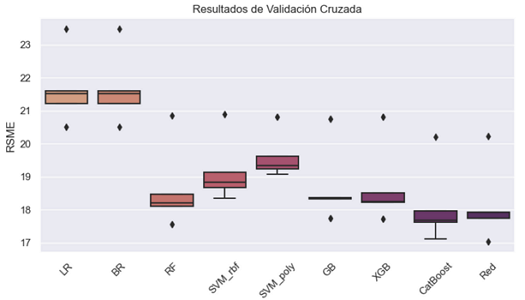
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 5: Resultados CV para diferentes algoritmos</div>

Del gráfico anterior resalta que la mejor performance es obtenida con un modelo tipo Catboost. El siguiente con un rendimiento comparable es la red neuronal. Sin embargo, nos centraremos en arquitecturas de tipo red más adelante. 
Antes de abordar la tarea de predicción con el modelo Catboost, es importante destacar que este algoritmo forma parte de la familia de modelos basados en árboles. Por tanto, no sería estrictamente necesario realizar escalado de las variables numéricas, lo que a su vez simplifica el preprocesamiento de los datos. Además, gracias a su habilidad para manejar automáticamente las variables categóricas, se podría evitar la necesidad de codificarlas manualmente. Por lo antedicho, se consideraron diferentes escenarios de preprocesamiento de datos. Se evaluaron variables numéricas escaladas y no escaladas, así como variables categóricas tratadas y sin tratamiento. Sin embargo, el resultado más prometedor fue el uso de variables numéricas escaladas y variables categóricas convertidas a dummies.

#### AJUSTE DE HIPERPARÁMETROS

La optimización de hiperparámetros es un proceso esencial en el desarrollo de modelos de machine learning, ya que permite ajustar las configuraciones del algoritmo para lograr el mejor rendimiento predictivo. Para este propósito, Optuna es una herramienta poderosa y eficiente en comparación con los enfoques tradicionales como GridSearch y RandomSearch. Sobresale al aplicar una optimización más inteligente, incorporando técnicas de búsqueda bayesiana y adaptación de muestreo. A diferencia de GridSearch y RandomSearch, que exploran configuraciones estáticas en un espacio predefinido, Optuna se ajusta a cada iteración, enfocándose en las áreas más prometedoras del espacio de hiperparámetros. Lo anterior se traduce en una exploración más eficiente y por ello, en esta instancia se optó por utilizar la librería Optuna.

Dentro del contexto de ajuste de hiperparámetros para el modelo Catboost, existen varios parámetros críticos que influyen en su desempeño. En este trabajo se ajustaron 9 de ellos: *loss_function, learning_rate, l2_leaf_reg, colsample_bylevel, depth, boosting_type, min_data_in_leaf, random_strength y iterations*. 

A continuación, se resume el proceso llevado a cabo para el ajuste de hiperparámetros:

1. Se definió una función objetivo que evalúa cada ensayo devolviendo un score. Dicho score se estableció como el promedio del RMSE en el conjunto de validación, con validación cruzada de 5 splits y val_size=15%.  
2. Se realizó un primer estudio de optimización de Optuna con 100 ensayos para el ajuste de todos los hiperparámetros mencionados, a excepción de las iteraciones. En este punto se utilizó un número grande de iteraciones y el criterio de parada temprana (early_stopping) para evitar sobreajuste (falta de generalización). 
3. Se determinaron los dos hiperparámetros que más influencia tuvieron en los resultados del estudio. 
4. Se creó un nuevo estudio de optimización variando solamente esos dos hiperparámetros (los restantes se definieron con el valor del mejor ensayo del primer estudio). Este nuevo estudio se generó con mayor cantidad de ensayos (150), y ampliando el rango de búsqueda de los hiperparámetros.
5. Del estudio anterior se tomaron los 3 mejores ensayos y se compararon mediante validación cruzada repetida (10 repeticiones) para finalmente seleccionar uno. 
6. Por último, se realizó un GridSearch con validación cruzada para determinar el número de iteraciones óptimo. 

El proceso completo y los resultados intermedios pueden consultarse en el **ANEXO D**
#### MODELO FINAL

Habiendo completado el ajuste de hiperparámetros se procedió a la etapa final de entrenar el modelo seleccionado. Para ello se utilizaron todos los datos de entrenamiento disponibles. Es importante destacar que hasta este momento no se empleó el conjunto de pruebas en ningún proceso, lo que garantiza que se evalúa el modelo en datos completamente nuevos y no utilizados previamente. Este enfoque asegura una evaluación imparcial y realista del rendimiento del modelo, permitiéndonos obtener una estimación más precisa de su capacidad para generalizar a datos no vistos.
  
**RESULTADO**    
El modelo obtenido fue capaz de predecir la vida útil remanente de un motor en los **datos de prueba** con un error promedio de 29.83 (**RMSE 29.83**). En las próximas secciones, se buscará mejorar este resultado mediante la incorporación de variables obtenidas a través de un análisis temporal. Sin embargo, es importante destacar que la fortaleza del modelo actual reside en su capacidad para realizar predicciones utilizando únicamente valores del tiempo presente, sin requerir información previa de cada variable. Esto, a su vez, simplifica el proceso de implementación en la producción y operación del sistema.

<h2 id="m2" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;">ENTRENAMIENTO Y EVALUACIÓN - CON ANÁLISIS TEMPORAL</h2>

Hasta este punto, se ha desarrollado un modelo que considera cada observación de manera independiente, sin tener en cuenta las posibles relaciones temporales. Ahora, avanzamos hacia una segunda fase en la que se espera mejorar el modelo mediante la incorporación de variables temporales. El objetivo fundamental de este siguiente paso es capturar la dependencia temporal inherente en los datos. Estas relaciones temporales pueden ofrecer una valiosa fuente de información para mejorar la precisión de las predicciones. Para lograrlo, se analizaron dos tipos principales de variables temporales: **estadísticos de ventana deslizante (rolling)** y **variables rezagadas (lags)**. El código completo puede consultarse en el **ANEXO E**.

#### ESTADÍSTICOS DE VENTANA DESLIZANTE

En esta primera instancia, se analizan los estadísticos de ventana deslizante. Esta técnica implica calcular una serie de estadísticas, como el promedio, máximo, mínimo y la desviación estándar, dentro de una ventana que se desplaza a lo largo de la serie temporal. Estos cálculos encapsulan tendencias y patrones en la información, ofreciendo una perspectiva suavizada y resumida de cómo la variable se comporta en función del tiempo.

El enfoque utilizado consistió en medir el impacto de incorporar el "rolling mean", "rolling max", "rolling min" y "rolling standard deviation" en el modelo. Al analizar estos efectos en profundidad, podremos determinar cuáles de estas estadísticas tienen un impacto más significativo en el desempeño general del modelo. Asimismo, para cada uno de los estadísticos se analizó el efecto de variar el tamaño de ventana. Por otro lado, se llevó a cabo un análisis para determinar cuáles variables se benefician de la aplicación de estos estadísticos y cuáles no, con el objetivo de adicionar las variables justas y necesarias.

**ANÁLISIS**  
Para estudiar el efecto de variar cada ventana se creó un modelo base, sin adición de variables temporales, para ser utilizado como punto de comparación. Como se vio en la sección anterior, dada la naturaleza no lineal del problema, se utilizó como modelo base un modelo Random Forest. Cabe destacar que dicho modelo solo se utilizó con el fin de comparar efectos. Una vez se haya determinado qué variables se incorporarán al conjunto de datos, se repetirá el proceso de selección de algoritmos, ajuste de hiperparámetros, entrenamiento y evaluación visto anteriormente.

El **modelo base presentó un RMSE de 18.64** (evaluado con 5 splits y un tamaño de validación del 15%).
Posteriormente, se procedió a entrenar un modelo Random Forest con la misma configuración de validación cruzada. Sin embargo, se realizó una modificación en el conjunto de datos: se agregaron variables generadas mediante el cálculo del "rolling mean" para cada sensor. Se realizaron estas adiciones para ventanas de tamaño 2 hasta 30. A continuación se repitió el proceso para cada uno de los estadísticos. Los resultados obtenidos y su comparación contra el modelo base se muestran a continuación:

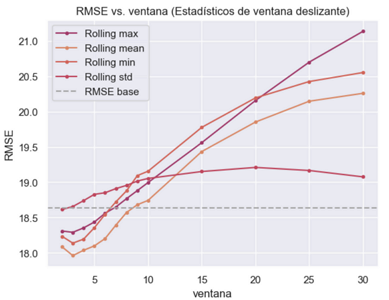
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 6: Evaluación ventana deslizante - estadísticos mean, min, max y std</div>


Con los resultados de estas evaluaciones se trazaron las siguientes conclusiones:
- La inclusión de variables "rolling_std" no aporta mejoras significativas en relación al modelo base, por lo que se descarta su incorporación.
- En cuanto a los demás estadísticos (min, max y mean), se opta por seleccionar un tamaño de ventana igual a 3, ya que es el que conduce a mejores resultados (menor RMSE).

Después de identificar las posibles variables de "rolling mean", "rolling min" y "rolling max" para su inclusión, el paso subsiguiente se enfocó en comparar el impacto de añadir cada una de estas variables (con una ventana de tamaño 3) tanto de manera individual como en conjunto. Como se observa en la siguiente tabla, el mejor resultado se obtiene adicionando únicamente las variables "rolling mean".

|         |    min    |    max    |    mean   | min_max_mean |
|---------|:---------:|:---------:|:---------:|:------------:|
|   RMSE  | 18.13 | 18.28 | **17.95** |   17.98   |

Por tanto, basándonos en los resultados obtenidos, se determinó la adición de variables de "rolling mean" con una ventana deslizante de tamaño 3.

Por último, se procedió a determinar si esta incorporación resulta beneficiosa para todos los sensores o, por el contrario, si alguno de ellos no contribuye significativamente a la mejora. Con este fin, se llevó a cabo una comparación de los efectos individuales de cada sensor. Los resultados se evaluaron bajo las mismas condiciones previas, pero con la adición de variables "rolling mean" para un único sensor a la vez. Esta estrategia permite comparar y analizar la contribución de cada sensor a la mejora observada anteriormente.

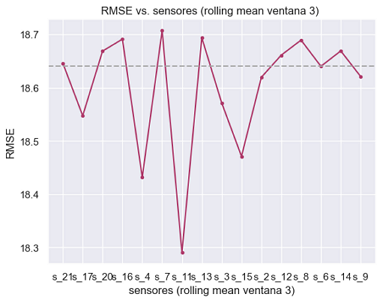
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 7: efectos individual sensores (Rolling Mean)</div>

Del gráfico anterior se puede observar que hay sensores para los cuales no resulta beneficioso incluir sus variables de "rolling mean" de manera individual. Por lo tanto, para analizar esto con mayor detalle, se compararon dos escenarios: uno que considera todos los sensores y otro que incluye únicamente los sensores donde la incorporación individual de las variables de "rolling mean" mejora el modelo base.

|         |    Escenario A    |    Escenario B    |
|---------|:---------:|:---------:|
|     | Todos los sensores | Sensores: 2, 3, 4, 6, 11, 9, 15, 17 y 21 | 
|   RMSE  |  17.96  | 18.0 | 


Al excluir las variables de "rolling mean" para ciertos sensores, se obtuvo un resultado muy similar, con una diferencia de apenas un 0.2% mayor. Sin embargo, cabe destacar que esta acción redujo la cantidad de variables en 7. Por tanto, en base a los resultados de los diferentes análisis se determinó añadir las variables de "rolling mean" con ventana 3 únicamente a los sensores 2, 3, 4, 6, 11, 9, 15, 17 y 21.

#### VARIABLES LAGGED

En una segunda instancia se exploró la técnica de variables desfasadas (o "lagged"). Esta estrategia implica crear versiones previas en el tiempo de una variable específica y utilizarlas como predictores en el modelo. Se calculan una serie de versiones desfasadas con diferentes intervalos, como "lag 1" (un paso atrás en el tiempo), "lag 2", y así sucesivamente. Al incorporar estas variables desfasadas, se busca capturar patrones y comportamientos pasados que podrían tener influencia en las tendencias futuras.

El enfoque utilizado consistió en evaluar el impacto de incluir variables con diferentes intervalos de desfase, como "lag 1", "lag 2", y otros. Al igual que con la técnica de ventana deslizante, también se exploró cómo la elección del tamaño del intervalo de desfase puede influir en el rendimiento del modelo. Al analizar exhaustivamente estos efectos, podremos determinar cuáles de estas variables desfasadas tienen un impacto más significativo en el rendimiento general del modelo y por tanto garantizar que se capturen de manera óptima los patrones de interés en los datos. Adicionalmente, se llevó a cabo un análisis para identificar qué variables son más beneficiosas al incluir sus versiones desfasadas y cuáles podrían no ser tan influyentes. El objetivo es determinar cuáles son las variables que aportan un valor significativo al modelo cuando se utilizan en su forma desfasada, y así poder seleccionar con precisión las variables desfasadas más relevantes.

**ANÁLISIS**  
Para estudiar el efecto de los diferentes lags se volvió a utilizar el modelo base como punto de comparación, modelo sin adición de variables temporales. En esta instancia se procedió a entrenar un modelo Random Forest con la misma configuración de validación cruzada usada para evaluar el modelo base. Sin embargo, se realizó una modificación en el conjunto de datos: se agregaron variables lagged para todos los sensores de forma secuencial. Inicialmente se adicionan variables lagged desde lag 1 hasta lag 5, luego desde lag 1 hasta lag 10 y así hasta adicionar desde lag 1 hasta lag 30.

Como se visualiza en la *Figura 8A*, al adicionar las primeras 5 variables lagged, se observa una mejora del RMSE, reduciéndose del valor base de 18.64 a 17.9. Sin embargo, al continuar adicionando lags el RMSE aumenta, es decir, el mejor resultado se alcanza con 5 variables lagged. Aun así, cabe resaltar que en cualquier caso el resultado sigue siendo mejor que el del modelo base. Teniendo en cuenta que el análisis se ha llevado a cabo con un step de 5, se procedió a explorar con mayor detalle la ventana dónde se se presentó el mejor resultado. Se analizó el efecto de ir agregando lags con step 1. Lo anterior se hizo de forma secuencial, es decir, primero se adicionó el lag de 1 (el valor de las variables en el instante anterior). Luego se adicionó el lag 2, pero manteniendo el lag de 1, y así hasta incluir las variables lagged de 1 a 10. Como se destaca en la *Figura 8B*, el óptimo desempeño se logra al incluir hasta 4 variables lagged. 

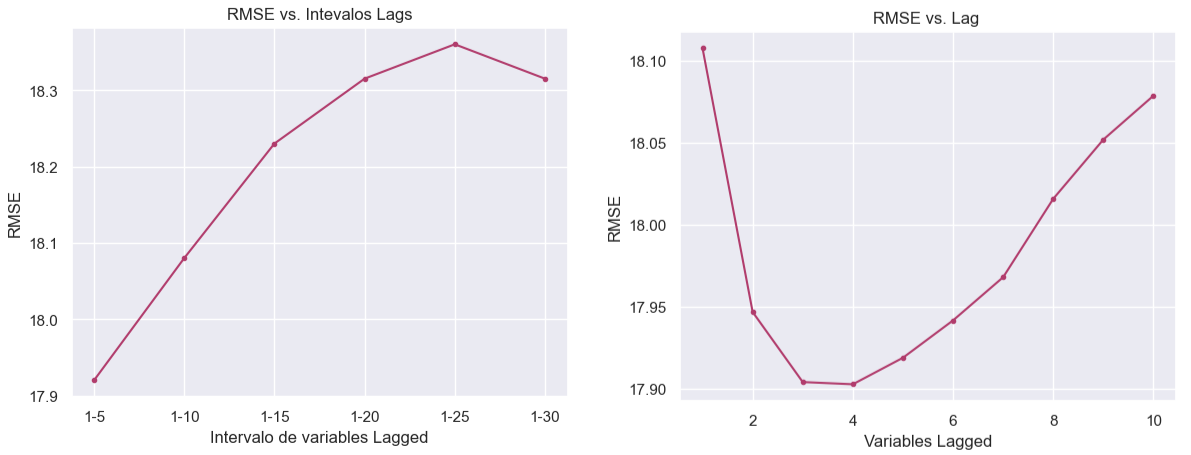
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 8A (izquierda): RMSE lags secuenciales (step 5) -- Figura 8B (derecha): RMSE lags secuenciales (step 1)</div>

Ahora bien, no se descarta la posibilidad de que haya algún lag más allá de 4, que individualmente beneficie el resultado. En el gráfico de la *Figura 9A*, se comparan los resultados tras agregar lags de forma individual, en lugar de secuencial. Se puede observar que solo los lags menores de 6 contribuyen a mejorar el resultado cuando se consideran de manera individual. A su vez, previamente se demostró que al incorporar los lags de manera secuencial, la mejora óptima en el rendimiento se obtiene al incluir los lags 1, 2, 3 y 4. Ya al adicionar los lags 5 y 6 el error aumenta.
Basándonos en los resultados obtenidos, se determinó la adición de variables de "lagged" con lags de 1 hasta 4.
Finalmente, se procedió a determinar si esta incorporación resulta beneficiosa para todos los sensores o, por el contrario, si alguno de ellos no contribuye significativamente a la mejora. Con este fin, se llevó a cabo una comparación de los efectos individuales de cada sensor. Los resultados se evaluaron bajo las mismas condiciones previas, pero con la adición de variables lagged (1 a 4) para un único sensor a la vez. Esta estrategia permite comparar y analizar la contribución de cada sensor a la mejora observada anteriormente. Dicho análisis se puede observar en la *Figura 9B*. 


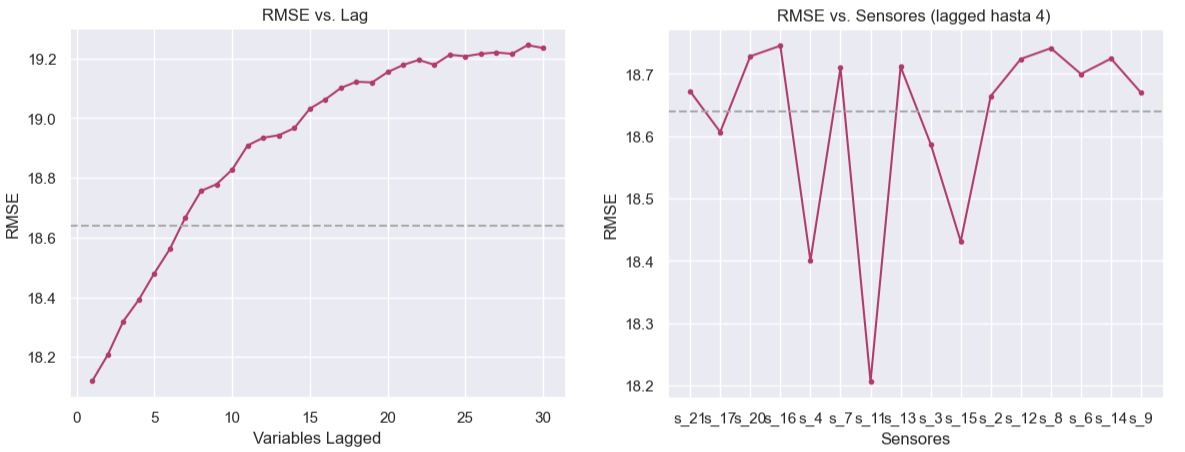
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 9A (izquierda): RMSE lags individuales-- Figura 9B (derecha): efectos individual sensores (lags de 1 a 4)</div>  

Del gráfico anterior se observa que hay sensores para los cuales no resulta beneficioso incluir sus variables de "lagged" de manera individual. Por lo tanto, para analizar lo anterior con mayor detalle, se compararon dos escenarios: uno que considera las variables lagged de todos los sensores, y otro que incluye únicamente los sensores donde la incorporación individual de sus variables de lagged mejora el modelo base.

|   Variables lagged:| Todos los sensores | Sensores: 3, 4, 11, 15, 17  | 
|---------|:---------:|:---------:|
|   RMSE  |  17.9  | 18.06 | 

Al excluir las variables lagged para ciertos sensores, se obtuvo un resultado ligeramente superior, con una diferencia de apenas un 0.9% mayor. Sin embargo, esta acción también tuvo como consecuencia una reducción sustancial en la cantidad de variables, disminuyendo en 44 (11 sensores multiplicados por 4 lags). En consecuencia, se optó por añadir las variables lagged con lags de 1 a 4 exclusivamente a los sensores 3, 4, 11, 15 y 17. Esta estrategia equilibra el rendimiento del modelo y la cantidad de variables (complejidad), con el objetivo de optimizar el resultado general.

#### CONSTRUCCIÓN DEL MODELO
Habiendo completado una nueva fase de ingeniería y selección de variables, se volvió a proceder a la construcción del modelo, ahora incluyendo las siguientes variables temporales:
- Variables "Rolling Mean" en una ventana de 3 para los sensores: 2, 3, 4, 6, 11, 9, 15, 17 y 21.
- Variables lagged, con lags de 1 a 4 para los sensores 3,4,11,15 y 17

Para este nuevo escenario, se vuelve a evaluar el desempeño de diversos tipos de algoritmos. Lo anterior se llevó a cabo con validación cruzada de 5 splits y un tamaño de validación de 15%. Al igual que en el caso anterior el modelo Catboost fue el que reportó mejores resultados. 

#### MODELO FINAL

Respecto al ajuste de hiperparámetros se utilizó el mismo esquema que en la sección anterior, utilizando estudios de Optuna. Para ampliar sobre los resultados parciales se puede consultar el **ANEXO F**. Tras haber completado el ajuste de hiperparámetros se procedió a la etapa final de entrenamiento del modelo seleccionado. Para ello se utilizaron todos los datos de entrenamiento disponibles. Nuevamente, en esta segunda fase de adición de variables temporales, los datos de prueba no se han utilizado en ningún proceso, a efectos de evaluar el modelo final de forma imparcial. 

**RESULTADO**  
El modelo obtenido fue capaz de predecir la vida útil remanente de un motor en los **datos de prueba** con un error promedio de 29.67 (**RMSE 29.67**). Recordando, el modelo entrenado en la fase 1, sin adición de variables temporales arrojó un RMSE en el conjunto de prueba de 29.83. Aunque la mejora en el rendimiento de 29.83 a 29.67 podría parecer modesta, es importante reconocer que incluso pequeñas mejoras pueden tener un impacto significativo especialmente en aplicaciones críticas. En este caso pequeñas reducciones en el error se traducen en una mayor confiabilidad en la identificación de cuándo un motor puede requerir mantenimiento o atención. 

En la próxima sección se analizará una estrategia más sofisticada que aprovecha la naturaleza secuencial de los registros, una arquitectura de red neuronal recurrente que tiene la capacidad inherente de capturar relaciones temporales y secuenciales, sin adicionar variables manualmente. 

<h2 id="m3" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;">ENTRENAMIENTO Y EVALUACIÓN - RED NEURONAL RECURRENTE</h2>

El aprendizaje profundo (Deep Learning) ha demostrado tener un rendimiento superior en muchos campos. En particular, ha demostrado amplias mejorías en ámbitos vinculados con datos de series temporales. El Mantenimiento Predictivo es un ejemplo donde contamos con datos temporales para monitorear el estado de un equipo con el objetivo de encontrar patrones que permitan predecir fallos, por lo que también puede beneficiarse de ciertos algoritmos de aprendizaje profundo. Entre los métodos de aprendizaje profundo, las redes LSTM (Long Short Term Memory) son especialmente atractivas para el ámbito del mantenimiento predictivo debido a que son muy efectivas para aprender de secuencias. Mejoran la detección de patrones de fallos al permitir una retrospección a largo plazo en el tiempo.    
Los modelos tradicionales, como los hasta ahora trabajados, se fundamentan en la ingeniería de variables, que consiste en la construcción manual de variables temporales mediante análisis o experiencia en el sector. Lo anterior conduce a que estos modelos sean difíciles de reutilizar, ya que la ingeniería de variables es específica para el escenario del problema y los datos disponibles, que varían de un negocio a otro. Por tanto, la ventaja más atractiva de aplicar el aprendizaje profundo es el hecho de que estas redes pueden extraer automáticamente las características adecuadas de los datos, eliminando la necesidad de la ingeniería manual.  
Las redes LSTM son capaces de tomar una secuencia de una ventana de tiempo determinada como entrada y deslizar esta ventana a lo largo de la serie temporal. Este enfoque nos permite aprovechar al máximo la dependencia temporal inherente en los datos, sin necesidad de intervención manual. Por ello, un parámetro importante que se deberá considerar es la longitud de secuencia, es decir el tamaño de la ventana.

#### CREACIÓN DE SECUENCIAS

La siguiente imagen ilustra el proceso de creación de secuencias con un tamaño de ventana de 4. Se inicia seleccionando este tamaño de ventana y luego se procede a recorrer el conjunto de datos. La primera secuencia se forma tomando los primeros 4 valores de todas las variables independientes, generando así una matriz de tamaño (tamaño de la ventana, cantidad de variables). Esta matriz se convierte en un registro de nuestro conjunto X y se asocia con un valor de RUL (y), que en este ejemplo corresponde al tiempo 4. La siguiente secuencia será entonces una matriz con las observaciones del tiempo 1 al 5 para todas las variables independientes, y estará asociado a una variable objetivo correspondiente al tiempo 5. De esta forma se recorre todo el conjunto de datos.
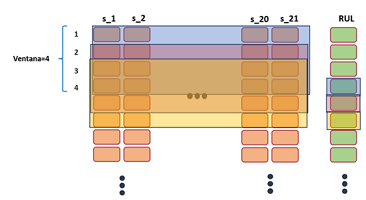

Ahora bien, es importante resaltar que lo anterior se debe realizar por unidad de motor. Las secuencias solo deberían contener datos de un único "unit_num" para evitar mezclar registros donde la falla es inminente con registros del siguiente motor que aún funciona correctamente. En base a lo mencionado anteriormente, se definió una función para crear secuencias a partir del dataframe original y una ventana especificada. 

#### CONSTRUCCIÓN DEL MODELO

En el proceso de desarrollo de un modelo LSTM, se llevó a cabo una exploración de diferentes arquitecturas de redes neuronales recurrentes. El objetivo principal fue comprender cómo se comportaban estos modelos en relación con nuestro conjunto de datos. Se realizaron pruebas utilizando distintas configuraciones, comenzando desde más simples hasta más complejas (incrementando la profundidad de las redes): 
- MODELO A: Una capa LSTM, y una capa densa de salida.
- MODELO B: Dos capas LSTM y una capa densa de salida.
- MODELO C: Tres capas LSTM y una capa densa de salida.
- MODELO D: Dos capas LSTM y dos capas densas.
- MODELO E: Tres capas LSTM y dos capas densas.

Para un análisis más exhaustivo de las distintas arquitecturas propuestas, se entrenaron los cinco modelos utilizando dos tamaños de ventana diferentes: uno pequeño (5) y otro grande (30). Esto se hizo con el propósito de obtener conclusiones más sólidas. Cabe resaltar que esta primera exploración tuvo por objetivo determinar una arquitectura adecuada. La selección del tamaño de ventana, así como el ajuste de los hiperparámetros se realizó en una fase posterior.

Con el objetivo de analizar los resultados, se examinó la evolución de la función de pérdida (el error) en los conjuntos de entrenamiento y validación para todas las configuraciones consideradas. 

Al comparar los cinco modelos utilizando una ventana pequeña (tamaño 5), no se observa una mejora significativa de uno sobre otro. Los resultados mostraron un comportamiento bastante similar, sin que ningún modelo se destacara claramente sobre los demás en cuanto a la pérdida en el conjunto de validación. Para ver más detalladamente estos resultados y otros intermedios consultar el **ANEXO G**. Por otro lado, la siguiente figura presenta los resultados obtenidos utilizando una ventana de tamaño 30.

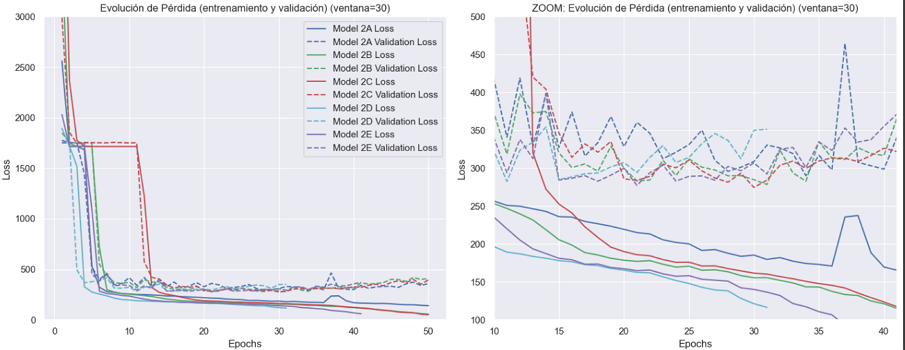
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 10: resultados para los 5 modelos (ventana =30)</div>

Al examinar la comparación de los cinco modelos utilizando una ventana de 30 (*Figura 10*), se destaca que, en todos los modelos surge el fenómeno de sobreajuste a partir de las 20 o 25 épocas. Esto es, se continúa disminuyendo el error en el conjunto de entrenamiento, pero el modelo ya no es capaz de generalizar, y por tanto aumenta el error en el conjunto de validación. Es importante notar que los modelos A y B presentan resultados por encima (mayor error) en comparación con los modelos C, D y E, lo que lleva a considerar su descarte.
Al contrastar los modelos C, D y E, se aprecia que el modelo C requiere más tiempo para alcanzar la convergencia. A su vez, previo a la aparición de indicios de sobreajuste, es el modelo E el que consigue los resultados más prometedores, motivo por el cual se selecciona la arquitectura de dicho modelo.

Por otro lado, se contrastó cada arquitectura de modelos considerando el tamaño de ventana. La *Figura 11A* muestra el contraste para uno de ellos (Modelo E). Se pudo observar que los cinco modelos logran un desempeño superior al emplear una ventana de tamaño 30. Esto resalta el claro impacto del tamaño de la ventana en el rendimiento general del modelo. En consecuencia, el siguiente paso consistió en evaluar minuciosamente los resultados del modelo seleccionado (Modelo E) al variar el tamaño de la ventana. Esta evaluación se realizó utilizando validación cruzada con tamaños de ventanas comprendidos entre 5 y 30 (*Figura 11B*). 

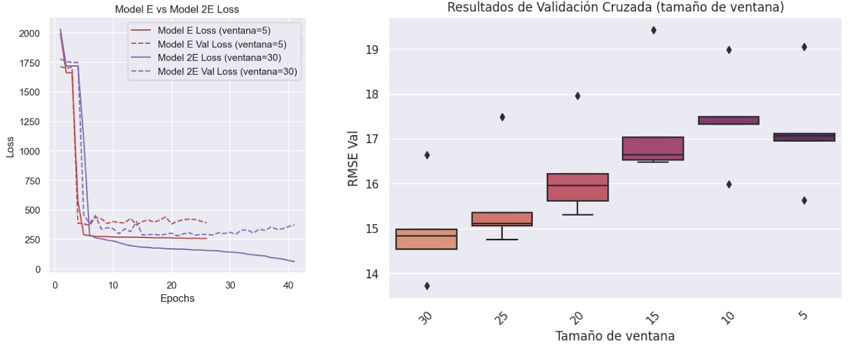
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 11A (izqueirda): resultados Modelo E -- Figura 11B (derecha): Resultados de CV Modelo E para diferentes ventanas</div>

Si bien al pasar de una ventana de 5 a 10 el error aumentó, al continuar incrementando el tamaño de ésta, el error disminuye de manera significativa. Esto llevó a la elección del tamaño de ventana 30, que demostró tener el menor error entre las opciones evaluadas.
#### AJUSTE DE HIPERPARÁMETROS 

En esta etapa, nos adentraremos en el proceso crucial de ajuste de hiperparámetros, el cual desempeña un papel fundamental para optimizar el rendimiento del modelo. Hasta ahora, se ha definido el tamaño de ventana y la arquitectura de la red, pero todavía no se ha explorado el impacto de los hiperparámetros en los resultados del modelo. 

Para el ajuste de hiperparámetros se utilizó KerasTuner, un marco de optimización de hiperparámetros pensado para diferentes arquitecturas de Deep Learning. Este marco ofrece varios algoritmos de optimización, en particular se seleccionó el algoritmo Hyperband. Hyperband en lugar de probar todas las combinaciones posibles de hiperparámetros o combinaciones aleatorias, divide los recursos disponibles en "bandas" y prueba varias configuraciones en paralelo. Descarta rápidamente las combinaciones menos prometedoras y asigna más recursos a las más prometedoras. Esto permite identificar de manera más rápida y eficiente la mejor combinación de hiperparámetros que optimiza el rendimiento del modelo.

En el contexto de redes neuronales, los principales hiperparámetros a explorar son la *función de activación* y el *número de neuronas en cada capa*. Asimismo, existen hiperparámetros vinculados a la optimización, en particular, *la tasa de aprendizaje* (learning rate) y el *tamaño de lote* (batch size). Por último, es relevante destacar que, si bien las redes neuronales tienen un gran potencial para capturar patrones complejos en los datos, también poseen una propensión alta al sobreajuste. Esto se debe a su capacidad para ajustarse en exceso a los detalles ruidosos de los datos de entrenamiento, lo que puede resultar en un rendimiento deficiente en datos no vistos. Para abordar esta problemática, surgen las técnicas de regularización. Estas estrategias buscan contrarrestar el sobreajuste al introducir ciertas restricciones en la red neuronal durante el proceso de aprendizaje. En este trabajo se utilizaron dos técnicas de regularización: el dropout y la parada temprana (early stopping). La técnica de dropout desactiva selectivamente neuronas durante el entrenamiento, evitando el sobreajuste y promoviendo la generalización. La detención temprana monitoriza la pérdida en el conjunto de validación y detiene el entrenamiento cuando los signos de sobreajuste se vuelven evidentes. Al introducir dropout se deba ajustar también el hiperparámetro de *dropout_rate*.

A continuación, se resume el proceso llevado a cabo para el ajuste de hiperparámetros:
1. Se definió una clase llamada MyHypermodel, que sirvió para construir y entrenar diferentes variantes del modelo con distintos hiperparámetros. Dentro se establecieron rangos y valores iniciales para cada hiperparámetro, y se definió la arquitectura del modelo previamente seleccionado.
2. Se empleó Hyperband para la optimización, donde el modelo se entrenó con diversas combinaciones de hiperparámetros utilizando el conjunto de entrenamiento y se evaluó su rendimiento en el conjunto de validación.
3. Con los mejores hiperparámetros obtenidos se realizó un análisis más exhaustivo del Dropout para analizar su efecto al agregarlo individualmente en cada una de las capas. 
4. Durante los pasos mencionados, se aplicaron técnicas como la parada temprana para detener el entrenamiento en caso de sobreajuste y checkpoints para guardar los mejores resultados. En consecuencia, no fue necesario deliberar sobre el número óptimo de épocas. Por tanto, antes de proceder a entrenar el modelo final se realizó un análisis mediante validación cruzada para determinar dicho número.

El proceso completo y los resultados intermedios pueden consultarse en el **ANEXO H**. 
#### MODELO FINAL
Tras haber completado el ajuste de hiperparámetros se procedió a la etapa final de entrenamiento del modelo seleccionado. Para ello se utilizaron todos los datos de entrenamiento disponibles. Nuevamente, en esta tercera fase, los datos de prueba no se han utilizado en ningún proceso a efectos de evaluar el modelo final de forma imparcial.

**RESULTADOS**  
El modelo obtenido fue capaz de predecir la vida útil remanente de un motor en los **datos de prueba** con un error promedio de 26.44 (**RMSE 26.44**). Los resultados obtenidos reflejan mejoras sustanciales en el rendimiento del modelo. El error se redujo en aproximadamente un 10% en comparación con la fase anterior, disminuyendo el RMSE de 29.67 a 26.44. Estos resultados resaltan la innata capacidad de las redes neuronales recurrentes para capturar de manera efectiva los patrones temporales presentes en los datos, sin necesidad de crear variables temporales de forma manual.

<h2 id="despliegue" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;"> DESPLIEGUE DEL MODELO FINAL</h2>

Finalmente, se desarrolló una aplicación con una interfaz web y una API utilizando Flask, que permite a los usuarios obtener predicciones de la vida útil remanente de motores. La API ofrece un endpoint */predict_file* donde los usuarios pueden cargar un archivo CSV con los datos de sensores y condiciones de trabajo del motor. Estos datos se preprocesan y luego se introducen en el modelo previamente entrenado para obtener una predicción de la RUL. La predicción se devuelve como respuesta, proporcionando a los usuarios una estimación de la vida útil remanente del motor. Además, la API cuenta con un endpoint */info* que brinda detalles sobre el nombre y la versión del modelo. La documentación de la API se genera automáticamente y se presenta en una interfaz web interactiva gracias a la biblioteca flasgger, lo que facilita la interacción con la API y la obtención de predicciones de manera más intuitiva.

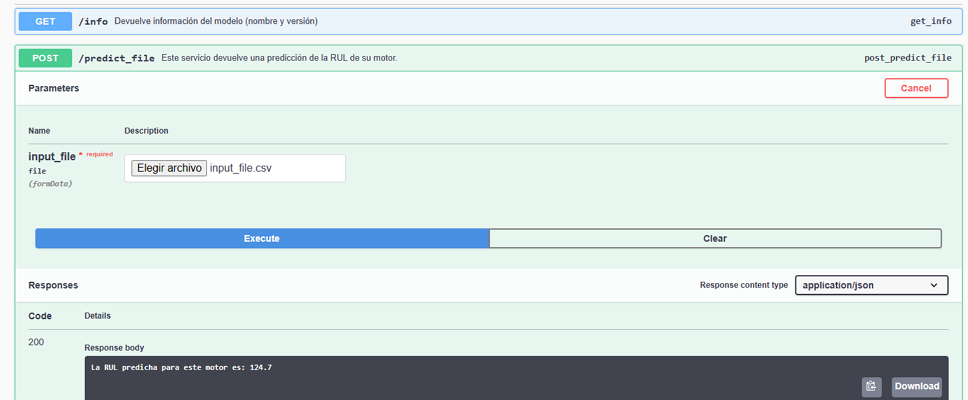
<div style="text-align:center; font-style:italic; font-size:11px;">Figura 12: Interfaz para obtención de predicciones</div>

El código utilizado en esta sección puede consultarse en el **ANEXO I**. 

<h2 id="conclusiones" style="background-color: #80B8D1 ; color: white; padding: 5px;font-size:20px;"> CONCLUSIONES </h2>

Este estudio se ha centrado en abordar el desafío crítico de optimizar el mantenimiento en el contexto de la Industria 4.0, donde la eficiencia operativa y la competitividad son de suma importancia. A través de un enfoque gradual, se ha demostrado cómo la incorporación de la temporalidad en el análisis de datos puede mejorar significativamente la capacidad de predecir la vida útil remanente de motores. Desde un modelo inicial que no consideraba la dimensión temporal hasta una estrategia más avanzada utilizando una red neuronal recurrente LSTM, se ha mejorado el error promedio del modelo desde un valor de 29.83 en la etapa inicial hasta un 26.44 en el modelo final, reflejando la efectividad de esta evolución.

Es esencial destacar que incluso pequeñas mejoras en la precisión de las predicciones tienen un impacto significativo, especialmente en aplicaciones críticas como el mantenimiento predictivo. La reducción en el error se traduce en una mayor confiabilidad para identificar cuándo se requerirá mantenimiento o atención a un motor. Esto se traduce en ahorros tanto en términos de costos asociados con tiempos de inactividad y reparaciones no planificadas, así como en la optimización de los recursos y la gestión eficiente de las operaciones.

Al analizar individualmente los resultados de cada modelo, se destaca:

- Modelo 1: aunque presenta el mayor error, su simplicidad y la no necesidad de valores históricos para predecir, pueden resultar interesantes, sobre todo porque facilita su implementación o productivización .

- Modelo 2: a pesar de mejorar los resultados en un 0.5%, añade complejidad al incorporar 29 variables. Esta mejora marginal podría no justificar la complejidad adicional, especialmente al compararlo con el modelo siguiente, que es capaz de capturar relaciones temporales evitando la tarea laboriosa de creación de nuevas variables. 

- Modelo 3: aprovecha la capacidad intrínseca de las RNN para capturar relaciones temporales, mejorando en un 11%. Esta mejora sustancial compensa ampliamente el aumento en la complejidad. A pesar de que este enfoque depende de datos históricos para realizar predicciones, la industria cuenta actualmente con una abundante disponibilidad de datos y un monitoreo continuo de variables, lo que lo hace altamente implementable y no representa una limitación significativa.

Por todo lo expuesto, fue el Modelo 3 el que se seleccionó para su despliegue e implementación. La capacidad de este enfoque para adaptarse a los datos secuenciales y capturar patrones complejos a lo largo del tiempo subraya la importancia de la inteligencia artificial y la modelización avanzada en el mantenimiento predictivo.

Como pasos futuros para continuar avanzando en la mejora de la predicción de vida útil remanente de motores, se recomienda una exploración más profunda en el ámbito de las arquitecturas de redes neuronales. Esto implica investigar y aplicar modelos aún más profundos y complejos que puedan capturar patrones y relaciones aún más sutiles en los datos. Adicionalmente, se podría considerar la ampliación de las ventanas temporales utilizadas para análisis, lo que permitiría abordar patrones a largo plazo y capturar tendencias más extensas.

Otro camino interesante es la incorporación de técnicas de atención. Estas técnicas han demostrado un gran éxito en diversas aplicaciones. Al aplicar estas técnicas al análisis de datos secuenciales de motores, se podría lograr una comprensión más profunda de las interacciones y dependencias entre las variables a lo largo del tiempo.

In [3]:
from IPython.core.display import HTML, display

style = """
<style>
div.output_area {
    max-height: 500px; 
}

.rendered_html p {
    text-align: justify;
    font-size: 13px;
}

.rendered_html ul li, .rendered_html ol li {
    font-size: 13px;
}

.rendered_html h2#eda {
    background-color: #80B8D1;
    color: white;
    padding: 10px;
    font-size: 18px;
}
</style>
"""

display(HTML(style))
